In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import math

In [2]:
from pathlib import Path
results_path = Path('/home/selker/eop/eop/run_simulations/results')
figs_path = Path('/home/selker/eop/eop/run_simulations/figs')
figs_path.mkdir(exist_ok=True)

In [19]:
def plot_with_faceting(df, x_column, y_column, x_label, y_label, line_grouping_column, faceting_column, country):

    facet_groups = df.groupby(faceting_column)

    fig, axs = plt.subplots(2, math.ceil(len(facet_groups)/2), figsize=(12, 8), sharey=True) 
    for i, (facet_label, group) in enumerate(facet_groups):
        # Determine subplot index
        row = i // 2
        col = i % 2
        ax = axs[row, col]

        # Iterate over groups
        for group_label, group in group.groupby(line_grouping_column):
            # Plot y_column against x_column
            ax.plot(group[x_column], group[y_column], label=group_label, marker="o")

        if 'tolerance' in x_column and y_column == "post_transfer_poverty_rate":
            ax.plot(group[x_column], group[x_column], label="y=x", linestyle="dashed", color="black")

        # Add labels and title to each subplot
        ax.set_xlabel(x_label)
        ax.set_ylabel(y_label)
        ax.set_title(f'{faceting_column} = {facet_label}')
        legend = ax.legend()
        legend.set_title(line_grouping_column)

        # Add grid
        ax.grid(True)

    # Adjust layout and display plot
    plt.suptitle("{}: {} vs. {}".format(country, y_label, x_label))
    plt.tight_layout()
    plt.savefig(figs_path / "{}_{}_{}.pdf".format(country.lower(), x_column, y_column))
    plt.show()


def plot_without_faceting(df, x_column, y_column, x_label, y_label, line_grouping_column, country):


    fig, ax = plt.subplots(1,1, figsize=(12, 8)) 

    # Iterate over groups
    for group_label, group in df.groupby(line_grouping_column):
        # Plot y_column against x_column
        ax.plot(group[x_column], group[y_column], label=group_label, marker="o")

    if 'tolerance' in x_column and y_column == "post_transfer_poverty_rate":
        ax.plot(group[x_column], group[x_column], label="y=x", linestyle="dashed", color="black")

    # Add labels and title to each subplot
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    legend = ax.legend()
    legend.set_title(line_grouping_column)

    # Add grid
    ax.grid(True)

    # Adjust layout and display plot
    plt.suptitle("{}: {} vs. {}".format(country, y_label, x_label))
    plt.tight_layout()
    plt.savefig(figs_path / "{}_{}_{}.pdf".format(country.lower(), x_column, y_column))
    plt.show()

In [26]:
df = pd.read_csv(results_path / 'malawi.csv')

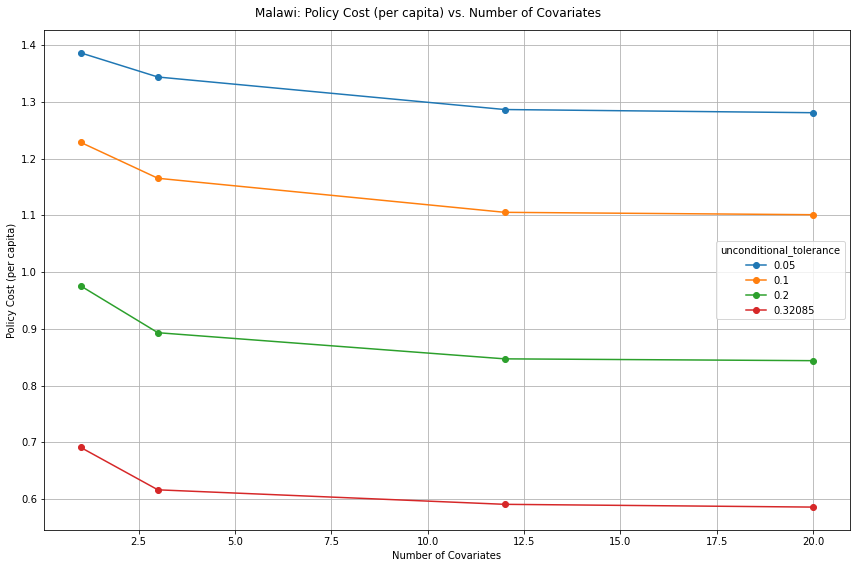

In [27]:
plot_without_faceting(
    df.sort_values('d'), 
    x_column='d',
    y_column='policy_cost', 
    x_label='Number of Covariates', 
    y_label='Policy Cost (per capita)', 
    line_grouping_column='unconditional_tolerance',
    country='Malawi'
)

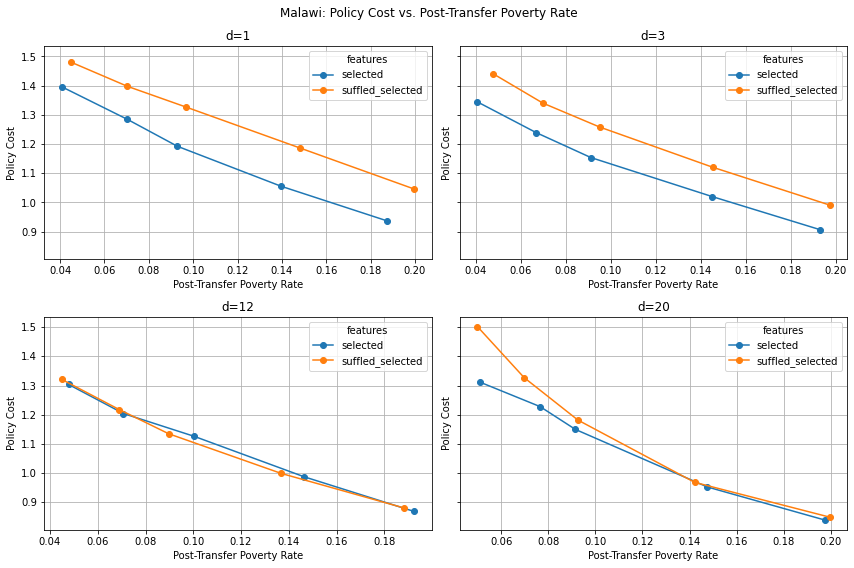

In [34]:
plot_x_vs_y(
    df, 
    x_column='post_transfer_poverty_rate',
    y_column='policy_cost', 
    x_label='Post-Transfer Poverty Rate', 
    y_label='Policy Cost', 
    grouping_column='features',
    country='Malawi'
)

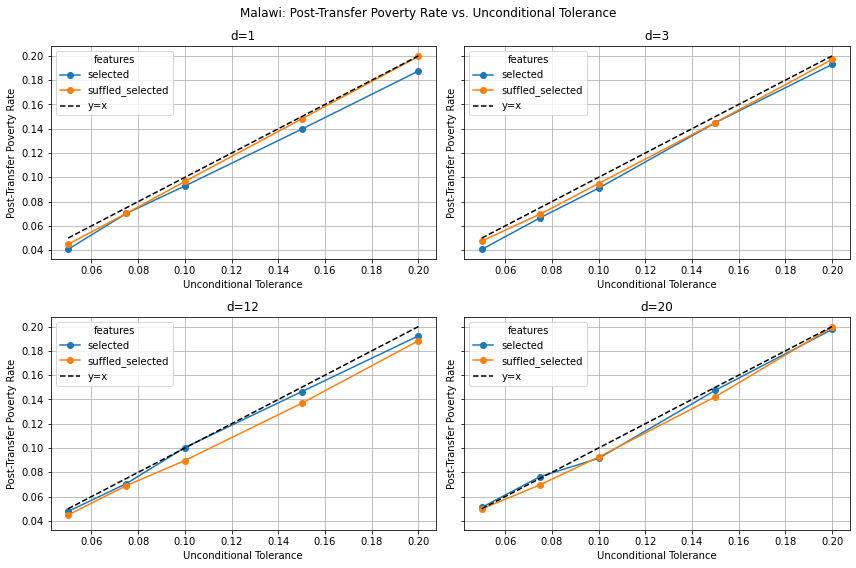

In [35]:
plot_x_vs_y(
    df, 
    x_column='unconditional_tolerance',
    y_column='post_transfer_poverty_rate', 
    x_label='Unconditional Tolerance', 
    y_label='Post-Transfer Poverty Rate', 
    grouping_column='features',
    country='Malawi'
)